In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read the data

In [13]:
df_train = pd.read_csv('house price dataset/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


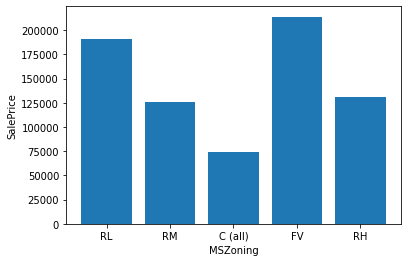

In [4]:
plt.hist(df_train['MSZoning'])
MSZoning = df_train.groupby(['MSZoning'],as_index=False).mean()
plt.bar(MSZoning['MSZoning'], MSZoning['SalePrice'])
plt.xlabel("MSZoning")
plt.ylabel("SalePrice")
plt.show()
plt.show()

# Question 1: Can construction year (YearBuilt) and above grade (ground) living area square feet (GrLivArea) can be used to estimade the house price? 

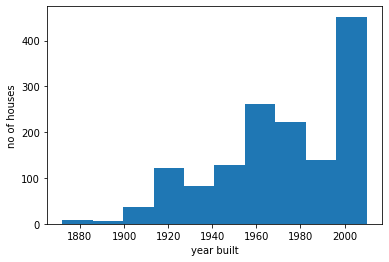

In [5]:
plt.hist(df_train['YearBuilt'])
plt.xlabel("year built")
plt.ylabel("no of houses")
plt.show()

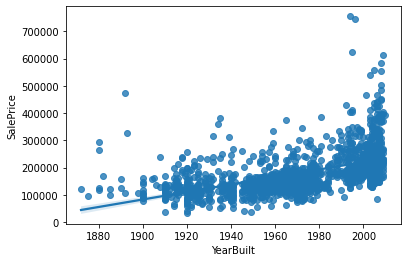

In [8]:
sns.regplot(x='YearBuilt',y='SalePrice',data=df_train)
plt.show()

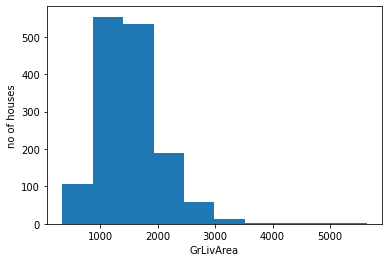

In [7]:
plt.hist(df_train['GrLivArea'])
plt.xlabel("GrLivArea")
plt.ylabel("no of houses")
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

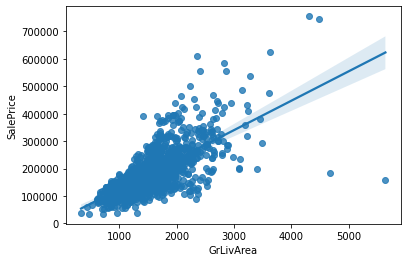

In [9]:
sns.regplot(x='GrLivArea',y='SalePrice',data=df_train)

* There seems to be a positive correlation between SalePrice and both GrLivArea and YearBuilt

In [14]:
# sub df
X = df_train[['GrLivArea', 'YearBuilt']].copy()
y = df_train[['SalePrice']].copy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Linear Regressiom

In [30]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
tolerance = 5e4 # $50.000
result = [1 if abs(y_valid.iloc[i].loc['SalePrice']-y_pred[i][0]) < tolerance else 0 for i in range(len(y_valid))]
print('Accuracy: ', sum(result) / len(y_valid) * 100)

Accuracy:  81.84931506849315


* We can observe a 81.8% accuracy when we set the prediction tolerance to $50,000.

# Hypothesis 2: Lot area ('LotArea') is a better indicator than 'GrLivArea'.

* In order to assess this hypothesis we will replace GrLivArea with LotArea.

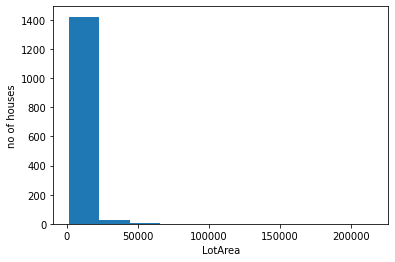

In [32]:
plt.hist(df_train['LotArea'])
plt.xlabel("LotArea")
plt.ylabel("no of houses")
plt.show()

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

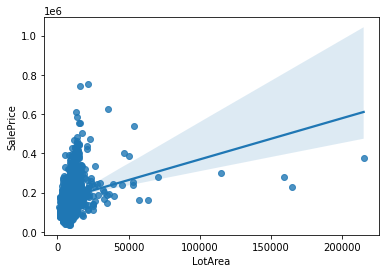

In [33]:
sns.regplot(x='LotArea',y='SalePrice',data=df_train)

In [34]:
# sub df
X = df_train[['LotArea', 'YearBuilt']].copy()
y = df_train[['SalePrice']].copy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Linear Regressiom

In [35]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
tolerance = 5e4 # $50.000
result = [1 if abs(y_valid.iloc[i].loc['SalePrice']-y_pred[i][0]) < tolerance else 0 for i in range(len(y_valid))]
print('Accuracy: ', sum(result) / len(y_valid) * 100)

Accuracy:  66.78082191780823


* As can be seen the accuracy is dropped down to 66.8% which is around 15% less than we obtained with GrLivArea. Thus, it can be inferred that GrLivArea is a better indicator of SalePrice than LotArea.